## Este script abarca desde el video 11-25

Found 982 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

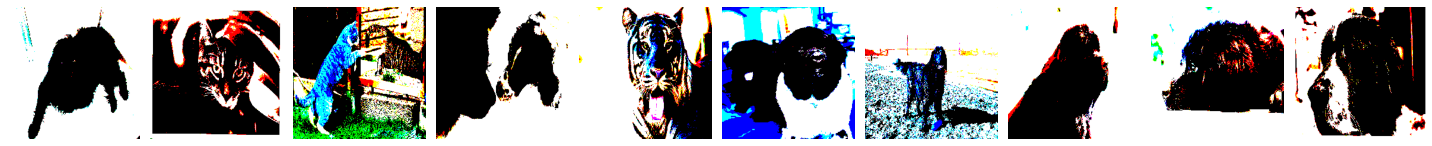

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
%run "confus_matrix.ipynb"
# Organiza la informacion en carpetas
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')#Se evita el overlaping moviendo los archivos, asi no hay repeticion    
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')
#Crea las direcciones para acceder a la informacion
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'
#Crea los "lotes" de datos
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
imgs,labels=next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

In [43]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transponse((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [52]:
#Crea los "lotes" de datos
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10,shuffle=False)

Found 982 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


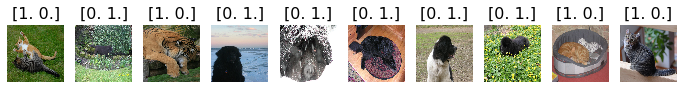

In [4]:
imgs,labels=next(train_batches)
plots(imgs, titles=labels)

https://deeplizard.com/learn/video/LhEMXbjGV_4

In [5]:
#Defininendo red CNN
model = Sequential([
    Conv2D(32,(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [6]:
#Compilando red
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Creando el modelo
model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches ,validation_steps=4 , epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/5
4/4 - 2s - loss: 267.0427 - accuracy: 0.7000 - val_loss: 165.6595 - val_accuracy: 0.7750
Epoch 2/5
4/4 - 2s - loss: 237.1237 - accuracy: 0.7750 - val_loss: 146.1255 - val_accuracy: 0.7750
Epoch 3/5
4/4 - 2s - loss: 361.3502 - accuracy: 0.7000 - val_loss: 374.3066 - val_accuracy: 0.7000
Epoch 4/5
4/4 - 2s - loss: 134.8025 - accuracy: 0.8250 - val_loss: 185.8646 - val_accuracy: 0.7000
Epoch 5/5
4/4 - 2s - loss: 157.6443 - accuracy: 0.8000 - val_loss: 105.0153 - val_accuracy: 0.7750


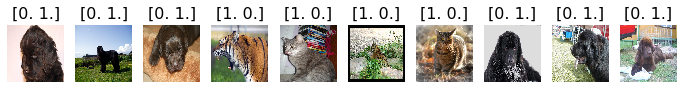

In [17]:
#Predicts
test_imgs,test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [18]:
test_labels = test_labels[:,0]

In [19]:
predictions = model.predict_generator(test_batches,steps=1, verbose=0) #realiza la prediccion
predictions

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Confusion matrix without normalization
[[2 4]
 [2 2]]


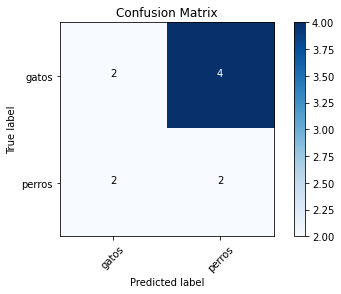

In [20]:
#Ploting the data
cm_labels=["gatos","perros"]
cm = confusion_matrix(test_labels,predictions[:,0])
plot_confusion_matrix(cm,classes=cm_labels,title='Confusion Matrix')

Improved One

In [21]:
vgg16_model = keras.applications.vgg16.VGG16()

In [22]:
vgg16_model.summary()
type(vgg16_model)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

tensorflow.python.keras.engine.training.Model

In [23]:
#convierte modelo en secuencial para poder trabajar
model=Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
model.layers.pop() #Quita la ultima capa #para usarse se debe de compilar primero
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [24]:
#alternativa
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
model.summary()
type(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

tensorflow.python.keras.engine.sequential.Sequential

In [25]:
#Hace que las capas previamente cargadas no sean entrenables, las fija
for layer in model.layers:
    layer.trainable = False

In [26]:
#Anade la ultima capa
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches ,validation_steps=4 , epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/5
4/4 - 49s - loss: 0.1804 - accuracy: 0.9250 - val_loss: 0.2441 - val_accuracy: 0.8750
Epoch 2/5
4/4 - 48s - loss: 0.2438 - accuracy: 0.9000 - val_loss: 0.2000 - val_accuracy: 0.9250
Epoch 3/5
4/4 - 58s - loss: 0.0891 - accuracy: 0.9706 - val_loss: 0.1718 - val_accuracy: 0.9500
Epoch 4/5
4/4 - 58s - loss: 0.2017 - accuracy: 0.9000 - val_loss: 0.1572 - val_accuracy: 0.9250
Epoch 5/5
4/4 - 55s - loss: 0.4056 - accuracy: 0.8250 - val_loss: 0.1342 - val_accuracy: 0.9500


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

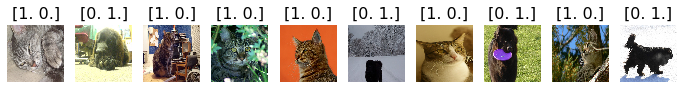

In [37]:
#Predictions
test_imgs,test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)
test_labels = test_labels[:,0]
predictions = model.predict_generator(test_batches,steps=1, verbose=0) #realiza la prediccion
predictions=np.rint(predictions)

Confusion matrix without normalization
[[4 0]
 [2 4]]


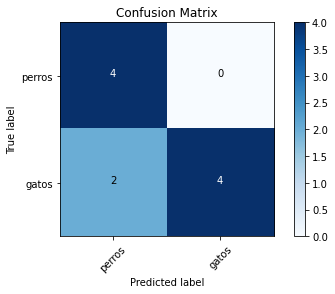

In [38]:
#Ploting the data
cm_labels=["perros","gatos"]
cm = confusion_matrix(test_labels,predictions[:,0])
plot_confusion_matrix(cm,classes=cm_labels,title='Confusion Matrix')

## MobileNet

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
%run "confus_matrix.ipynb"

In [24]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [42]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 5s 0us/step


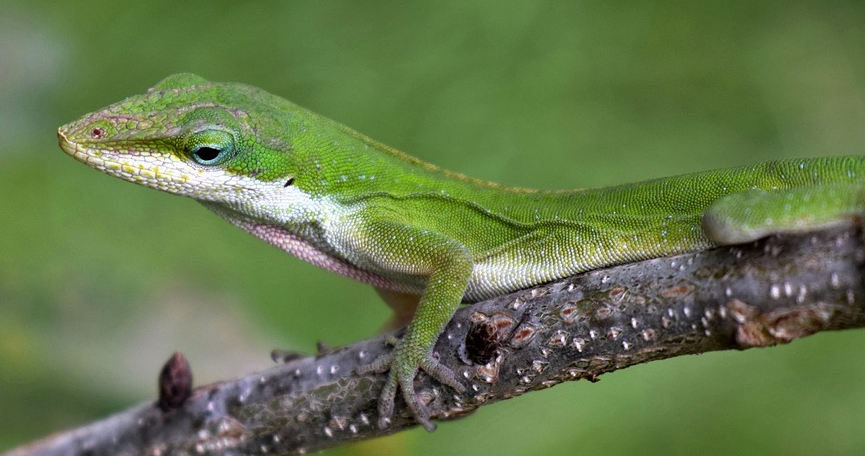

In [43]:
from IPython.display import Image
Image(filename='1.PNG', width=300,height=200) 

In [46]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)

In [49]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.5843134),
  ('n01693334', 'green_lizard', 0.2785577),
  ('n01687978', 'agama', 0.13019578),
  ('n01689811', 'alligator_lizard', 0.0047073164),
  ('n01688243', 'frilled_lizard', 0.001617671)]]

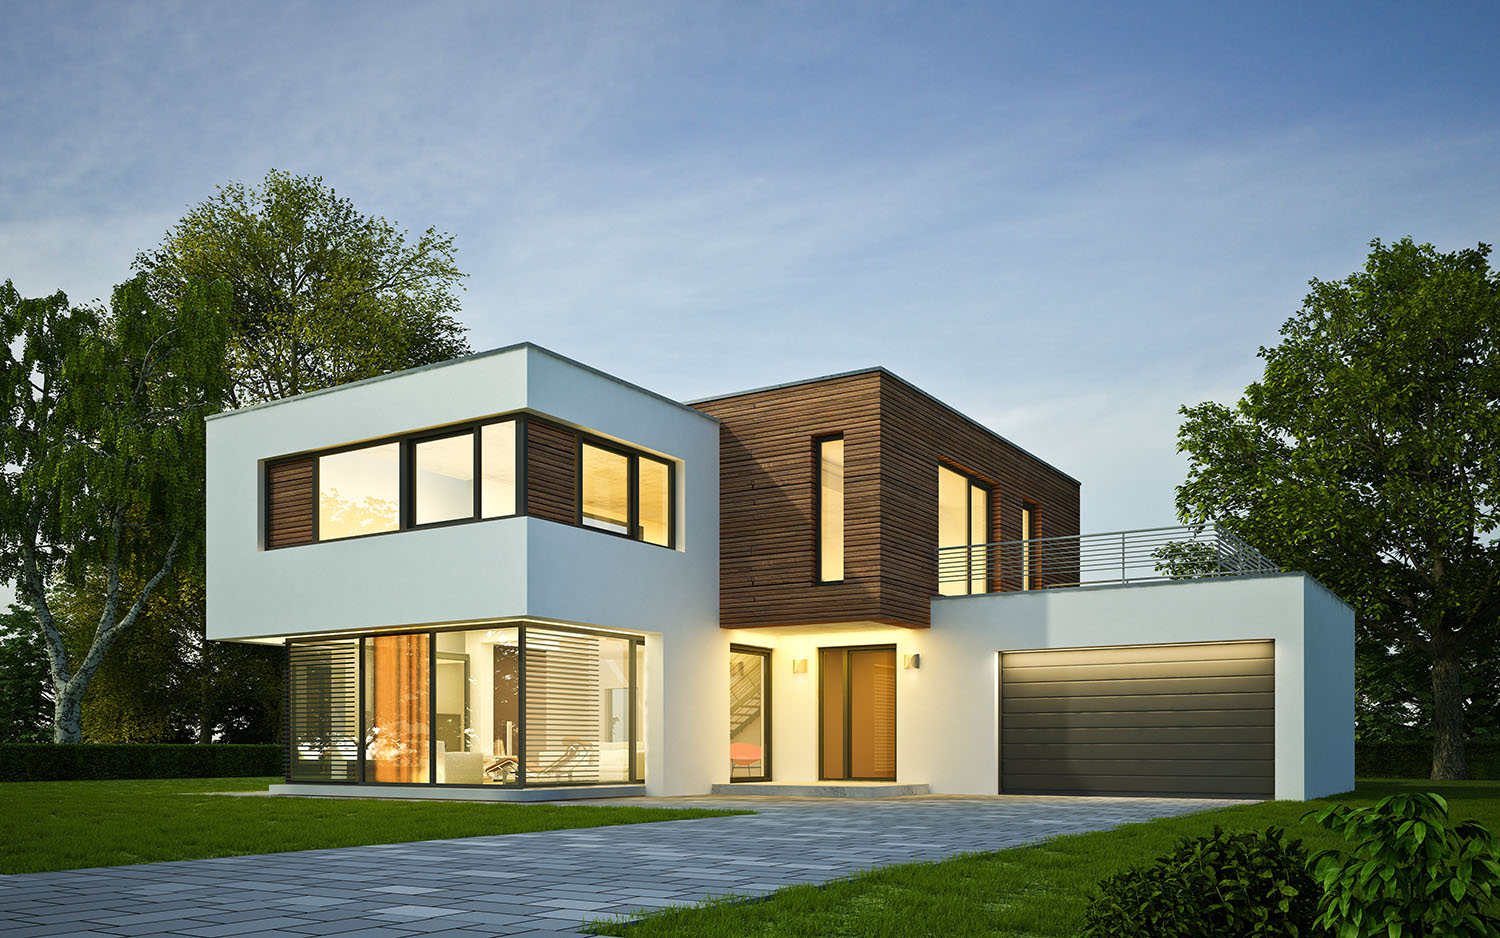

In [50]:
from IPython.display import Image
Image(filename='2.JPEG', width=300,height=200) 

In [51]:
preprocessed_image = prepare_image('2.JPEG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03032252', 'cinema', 0.47136933),
  ('n03776460', 'mobile_home', 0.15323493),
  ('n02859443', 'boathouse', 0.103898734),
  ('n03028079', 'church', 0.08802253),
  ('n03899768', 'patio', 0.04162671)]]

In [53]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10,shuffle=False)

Found 982 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [55]:
#modifying the model
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [60]:
x = mobile.layers[-6].output
output = Dense(units=2, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [59]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [61]:
#train the model
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches ,validation_steps=2 , epochs=30, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 2 steps
Epoch 1/30
4/4 - 14s - loss: 0.8267 - accuracy: 0.5250 - val_loss: 0.8884 - val_accuracy: 0.5500
Epoch 2/30
4/4 - 7s - loss: 0.7412 - accuracy: 0.5500 - val_loss: 0.8303 - val_accuracy: 0.6500
Epoch 3/30
4/4 - 7s - loss: 0.6680 - accuracy: 0.6000 - val_loss: 0.7717 - val_accuracy: 0.6000
Epoch 4/30
4/4 - 7s - loss: 0.6584 - accuracy: 0.6500 - val_loss: 0.7269 - val_accuracy: 0.6000
Epoch 5/30
4/4 - 6s - loss: 0.6090 - accuracy: 0.6000 - val_loss: 0.6901 - val_accuracy: 0.6000
Epoch 6/30
4/4 - 7s - loss: 0.5528 - accuracy: 0.7250 - val_loss: 0.6580 - val_accuracy: 0.6000
Epoch 7/30
4/4 - 7s - loss: 0.4876 - accuracy: 0.7750 - val_loss: 0.6295 - val_accuracy: 0.6500
Epoch 8/30
4/4 - 8s - loss: 0.5701 - accuracy: 0.7250 - val_loss: 0.6047 - val_accuracy: 0.6500
Epoch 9/30
4/4 - 7s - loss: 0.5426 - accuracy: 0.8000 - val_loss: 0.5860 - val_accuracy: 0.6500
Epoch 10/30
4/4 - 7s - loss: 0.4379 - accurac

In [62]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [65]:
predictions = model.predict(x=test_batches, verbose=0)

Confusion matrix without normalization
[[45  5]
 [ 5 43]]


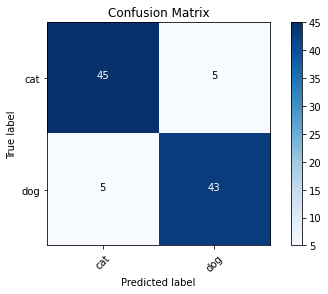

In [66]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


## Ejemplo manos

In [ ]:
#%cd Sign-Language-Digits-Dataset
#%mv 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/ train/ 

In [2]:
import os
# Organize data into train, valid, test dirs
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    #os.mkdir('train')
    #os.mkdir('valid')
    #os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [29]:
#Crea las direcciones para acceder a la informacion
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'
#Crea los "lotes" de datos
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(test_path, target_size=(224,224), batch_size=10,shuffle=False)


Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [22]:
from tensorflow.keras.models import load_model
try:
    model=load_model('Pesado.h5')
except:
    mobile = tf.keras.applications.mobilenet.MobileNet()
    #mobile.summary()
    x = mobile.layers[-6].output
    prediction = Dense(units=10, activation='softmax')(x)
    model = Model(inputs=mobile.input, outputs=prediction)
    #model.summary()
    model.fit_generator(train_batches,steps_per_epoch=18,
                    validation_data=valid_batches ,validation_steps=3 , epochs=60, verbose=2)
    for layer in model.layers[:-23]:
        layer.trainable = False
    model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    model.save('Pesado.h5') #Permite seguir entrenando desde el momento en que quedo guardado
finally:
    print(type(model))

<class 'tensorflow.python.keras.engine.training.Model'>


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Confusion matrix without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 1 0 0 0 0]
 [1 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 1 0 0 0 0 2 2 0]
 [0 0 0 0 0 0 0 1 0 4]]


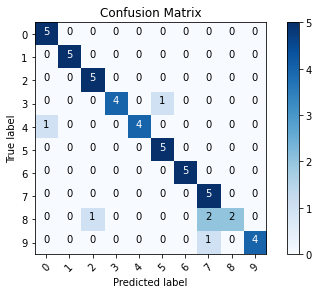

In [30]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(test_batches.class_indices)
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Otras cosas

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [32]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [37]:
image_path = 'data/aug/yo_ahorita.jpg'

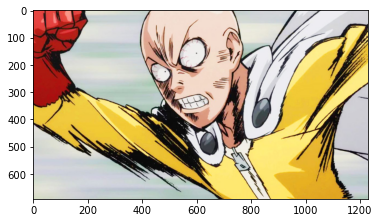

In [38]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [39]:
#genera lotes
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

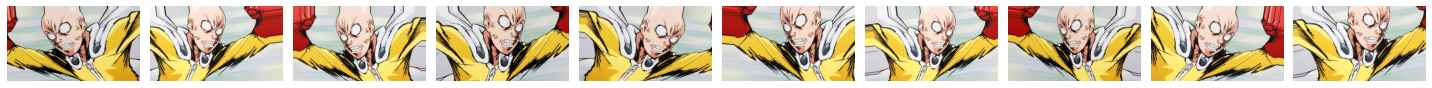

In [40]:
plotImages(aug_images)

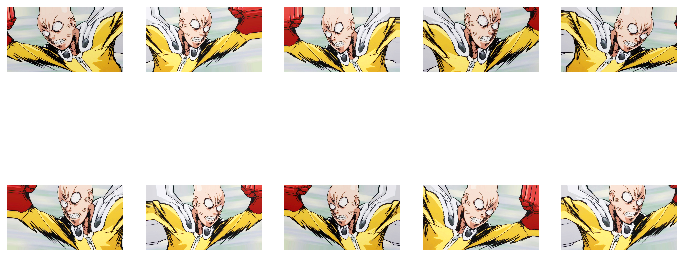

In [44]:
plots(aug_images,rows=2)